In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_csv('diabetes.csv')
data

gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0           0  80.0             0              1  25.19          6.6   
1           0  54.0             0              0  27.32          6.6   
2           1  28.0             0              0  27.32          5.7   
3           0  36.0             0              0  23.45          5.0   
4           1  76.0             1              1  20.14          4.8   
...       ...   ...           ...            ...    ...          ...   
99995       0  80.0             0              0  27.32          6.2   
99996       0   2.0             0              0  17.37          6.5   
99997       1  66.0             0              0  27.83          5.7   
99998       0  24.0             0              0  35.42          4.0   
99999       0  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes  
0                      140         0  
1                       80         0  
2                      158         0  
3                      155         0  
4                      155         0  
...                    ...       ...  
99995                   90         0  
99996                  100         0  
99997                  155         0  
99998                  100         0  
99999                   90         0  

[100000 rows x 8 columns]

In [18]:
missingvalue = data.isnull().sum()
print(missingvalue)


gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [20]:
X=data.drop('diabetes',axis=1)
y=data['diabetes']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

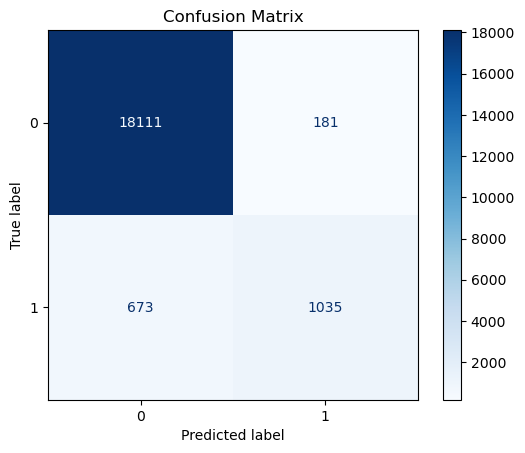

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Change labels as needed
disp.plot(cmap=plt.cm.Blues)  # You can choose another colormap if desired

# Customize plot if needed
plt.title("Confusion Matrix")
plt.show()


In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9573

In [32]:
import joblib

joblib.dump(model, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [34]:
import joblib

# Load the model from the file
loaded_model = joblib.load('diabetes_model.pkl')

# Make predictions with the loaded model
y_pred = loaded_model.predict([[0,80.0,0,1,25.19	6.6	140	]])
print(y_pred)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 13 features, but LogisticRegression is expecting 7 features as input.